In [1]:
# Modues to be used
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d import Axes3D

from datetime import datetime

In [3]:
# Load data from pickle files

# -> Player dictionary with the dataFrames
f = open('data/dict_player.pickle', 'rb')
dict_player = pickle.load(f)

# -> Map dataFrames
f = open('data/df_map.pickle','rb')
df_map = pickle.load(f)

# -> Map dictionary
f = open('data/dict_map.pickle','rb')
dict_map = pickle.load(f)

In [4]:
#dict_player[player_id].loc[97211]
dict_player[player_id].keys()

NameError: name 'player_id' is not defined

In [40]:
dict_player[player_id].head().keys()

Index(['map', 'date', 'team_id', 'team_name', 'player_id', 'player_name',
       'kills', 'hs_kills', 'assists', 'flash_assists', 'deaths', 'KAST',
       'kill_death_diff', 'ADR', 'first_kills_diff', 'rating',
       'kills_per_round', 'deaths_per_round', 'impact', 'team_score',
       'op_score', 'win', 'team_rank', 'prize'],
      dtype='object')

In [5]:
# First we take all the players in ranked teams from 2019
player_aux = {}

for player_id in dict_player:
    df_aux = dict_player[player_id][ dict_player[player_id]['date']>datetime(2019,1,1) ]

    if any( df_aux['team_rank']>0 ):
        player_aux[player_id] = {}

        prize = sum( df_aux['prize'] )
        if prize > 0.0:
            player_aux[player_id]['prize'] = np.log( prize ) / 12.0
        else:
            player_aux[player_id]['prize'] = 0.0

        player_aux[player_id]['rating']           = df_aux['rating'].mean()
        player_aux[player_id]['hs_perc']          = (df_aux['hs_kills']/df_aux['kills']).mean()
        player_aux[player_id]['kills_per_round']  = df_aux['kills_per_round'].mean()
        player_aux[player_id]['deaths_per_round'] = df_aux['deaths_per_round'].mean()
        player_aux[player_id]['ADR']              = df_aux['ADR'].mean() / 100.0

        player_aux[player_id]['KAST']              = df_aux['KAST'].mean() / 100.0
        player_aux[player_id]['score_dif']         = (df_aux['team_score']-df_aux['op_score']).mean()
        player_aux[player_id]['win_rate']          = df_aux['win'].mean()
        player_aux[player_id]['assists_per_round'] = ( (df_aux['assists'])/(df_aux['team_score']+df_aux['op_score']) ).mean()
        player_aux[player_id]['flash_per_round']   = ( (df_aux['flash_assists'])/(df_aux['team_score']+df_aux['op_score']) ).mean()

        # print( df_aux['player_name'].unique() )


In [50]:
df = pd.DataFrame.from_dict(player_aux,orient='index')
df.head()

,prize,rating,hs_perc,kills_per_round,deaths_per_round,ADR,KAST,score_dif,win_rate,assists_per_round,flash_per_round
39,0.882635,0.934453,0.492072,0.596641,0.692578,68.361719,0.655773,-0.429688,0.453125,0.159226,0.040913
884,0.875707,0.926379,0.418579,0.564914,0.657241,66.776724,0.672448,0.189655,0.517241,0.216049,0.064755
29,0.922176,1.105489,0.484255,0.721033,0.652391,75.958152,0.699255,0.054348,0.467391,0.142302,0.035515
7169,0.992370,1.026494,0.501223,0.634741,0.630815,67.535055,0.718192,2.512915,0.664207,0.143159,0.029104
629,0.717953,1.081700,0.326335,0.696300,0.688000,74.240000,0.691110,-0.610000,0.430000,0.160405,0.031409


In [6]:
# Using Euclidean distance
player_id = 7998

df = pd.DataFrame.from_dict(player_aux,orient='index')

#df = df.drop(['win_rate','score_dif','KAST','assists_per_round','flash_per_round'],axis=1)
# df = df.drop(['flash_per_round'],axis=1)

# df.prize = (df.prize - df.prize.mean()) / df.prize.std()
# df.rating = (df.rating - df.rating.mean()) / df.rating.std()
# df.head()

for column in df:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    
df_dist = df.copy()
df_dist['dist'] = df['rating']*0.0
for column in df:
    df_dist[column] = (df[column]-df.loc[player_id][column])**2
    df_dist['dist'] = df_dist['dist'] + df_dist[column]



df_dist = df_dist.sort_values('dist',ascending=True)

#df_dist = df_dist.head(n=20).sort_values('prize',ascending=True)

for player_id in df_dist.index[:50]:
    print( dict_player[player_id].player_name.unique() )


df_aux = df[ df.index.isin( df_dist.index.values ) ]
df_aux.sort_values('prize',ascending=False)

['s1mple']
['splashske']
['vsm']
['Brehze']
['ropz']
['floppy']
['mitsuha']
['dezon']
['electronic']
['d4v41']
['coldzera']
['meyern']
['mantuu']
['Jamppi']
['Bubzkji']
['yuurih']
['Kaze']
['MisteM']
['ZywOo']
['poizon']
['frozen']
['huNter' 'huNter-']
['hardzao']
['erkaSt']
['yay']
['KSCERATO']
['moose']
['elllement']
['JamYoung']
['Laz']
['EliGE']
['Papichulo']
['Benkai']
['Hatz']
['Olivia']
['crashies']
['device']
['DeathMakeR']
['zorte']
['TenZ']
['FREDDyFROG']
['somebody']
['lollipop21k']
['Kanpeki']
['somedieyoung']
['nexa']
['blameF']
['Infinite']
['shz']
['sh1ro']


,prize,rating,hs_perc,kills_per_round,deaths_per_round,ADR,KAST,score_dif,win_rate,assists_per_round,flash_per_round
7592,2.100018,1.870934,-1.597108,1.455226,-1.684907,1.231271,1.144666,1.834999,1.778866,0.246839,-0.053897
7412,2.100018,0.688880,-0.415855,0.185581,-1.008806,0.343170,0.628744,1.834999,1.778866,1.794676,1.237143
9032,2.100018,1.394416,-0.216066,0.867229,-1.521918,1.089000,1.605945,1.834999,1.778866,0.912367,-0.274464
7398,2.100018,1.076136,0.333700,0.740131,-1.431369,0.377645,1.210081,1.834999,1.778866,-0.166995,-0.574386
4954,2.100018,1.064865,-0.831356,0.333417,-1.984725,0.500237,1.612046,1.834999,1.778866,1.467543,0.726457
...,...,...,...,...,...,...,...,...,...,...,...
14790,-1.621842,-0.841269,0.875255,-0.826522,0.569496,-0.940346,-0.106686,-0.019483,-0.396939,-0.213354,-0.342919
13924,-1.621842,-0.439695,-0.173014,-0.426873,0.639946,0.027472,-0.377252,-0.347477,-0.331616,0.556364,0.069919
14545,-1.621842,-0.657723,-0.701313,-0.192369,1.043980,-0.371975,-0.504727,-1.173389,-1.529213,-0.248828,1.080669
14497,-1.621842,0.202444,0.627084,-0.107815,-0.042276,0.264630,-0.331378,-0.257641,-0.571135,0.219221,0.330621


In [81]:
df.keys()

Index(['prize', 'rating', 'hs_perc', 'kills_per_round', 'deaths_per_round',
       'ADR', 'KAST', 'score_dif', 'win_rate', 'assists_per_round',
       'flash_per_round'],
      dtype='object')

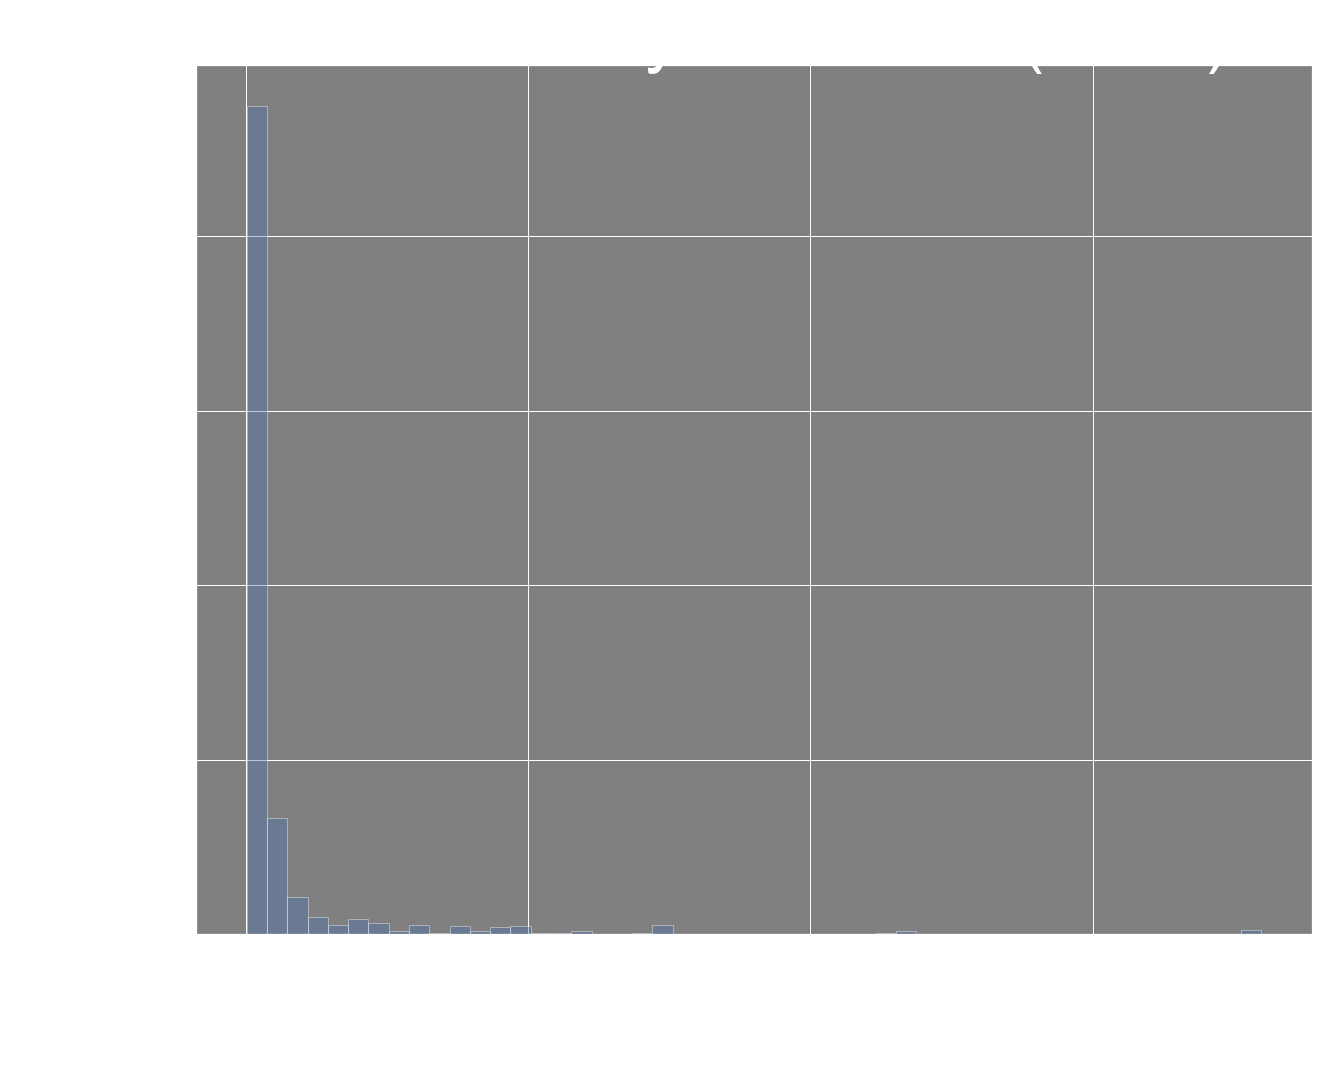

In [109]:
df_aux = pd.DataFrame.from_dict(player_aux,orient='index')
# df_aux.hist()



%matplotlib qt
%matplotlib inline

sns.set_style("whitegrid")
sns.set(font_scale=6)


colors = ['#0AA5B8', '#740AB8', '#B81D0A', '#4FB80A', '#0AA5B8', '#740AB8', '#B81D0A', '#4FB80A', '#0AA5B8', '#740AB8', '#B81D0A', '#4FB80A' ]

mpl.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                     'xtick.color' : "white",
                     'ytick.color' : "white"})


# mpl.rcParams.update({'text.color' : "black",
#                      'axes.labelcolor' : "black",
#                      'xtick.color' : "black",
#                      'ytick.color' : "black"})

                     
ind = 0

names = ['Prize Rating', 'Rating', 'Headshot %', 'Kills per Round', 'Deaths per Round',
       'Average Damage per Round', 'Rounds with Contribution', 'Score Differential', 'Win Rate', 'Assists per Round',
       'Flashes per Round']

# for column in df:
#     plt.figure(figsize=(20,16))
#     x = df[column].values
#     ax = sns.distplot(x,kde=False,color=colors[ind])
    
#     plt.title(names[ind]);
#     plt.xlabel('Z-score');
#     plt.ylabel('Counts');

#     ax.set_facecolor('gray')
#     plt.savefig(column+'.png', transparent=True)

#     ind = ind + 1 

    # sns.kdeplot(x, shade=True);


plt.figure(figsize=(20,16))
x = np.exp( 12.0*df_aux[df_aux['prize']>0.5]['prize'].values ) / 100000.0
ax = sns.distplot(x,kde=False)
plt.xlabel('Prize Money');
plt.ylabel('Counts');
plt.title('Prize Money Collected (2019)');
ax.set_facecolor('gray')
ax.set_xticklabels(['$0','$0','$100k','$200k','$300k','$400k'])
plt.savefig('prize_money.png', transparent=True)
plt.show()


In [104]:
x.max()

3.597500000000002

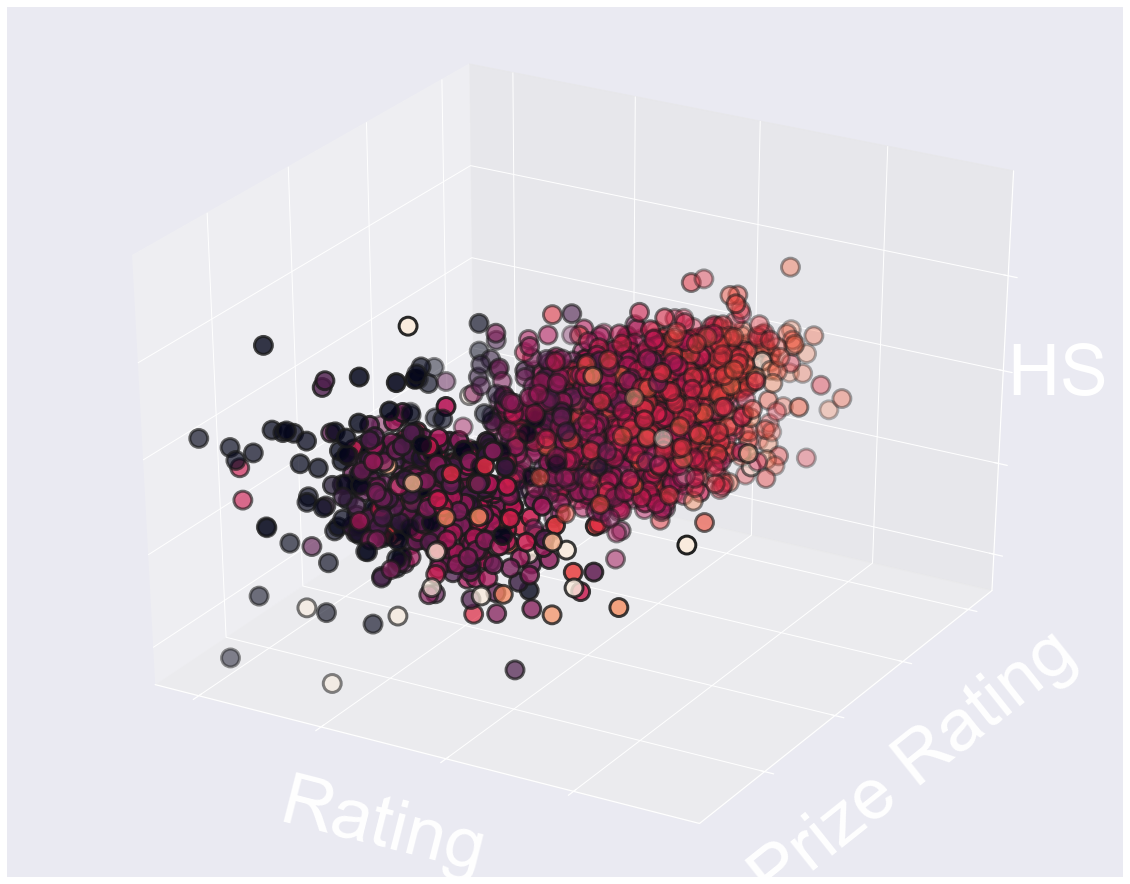

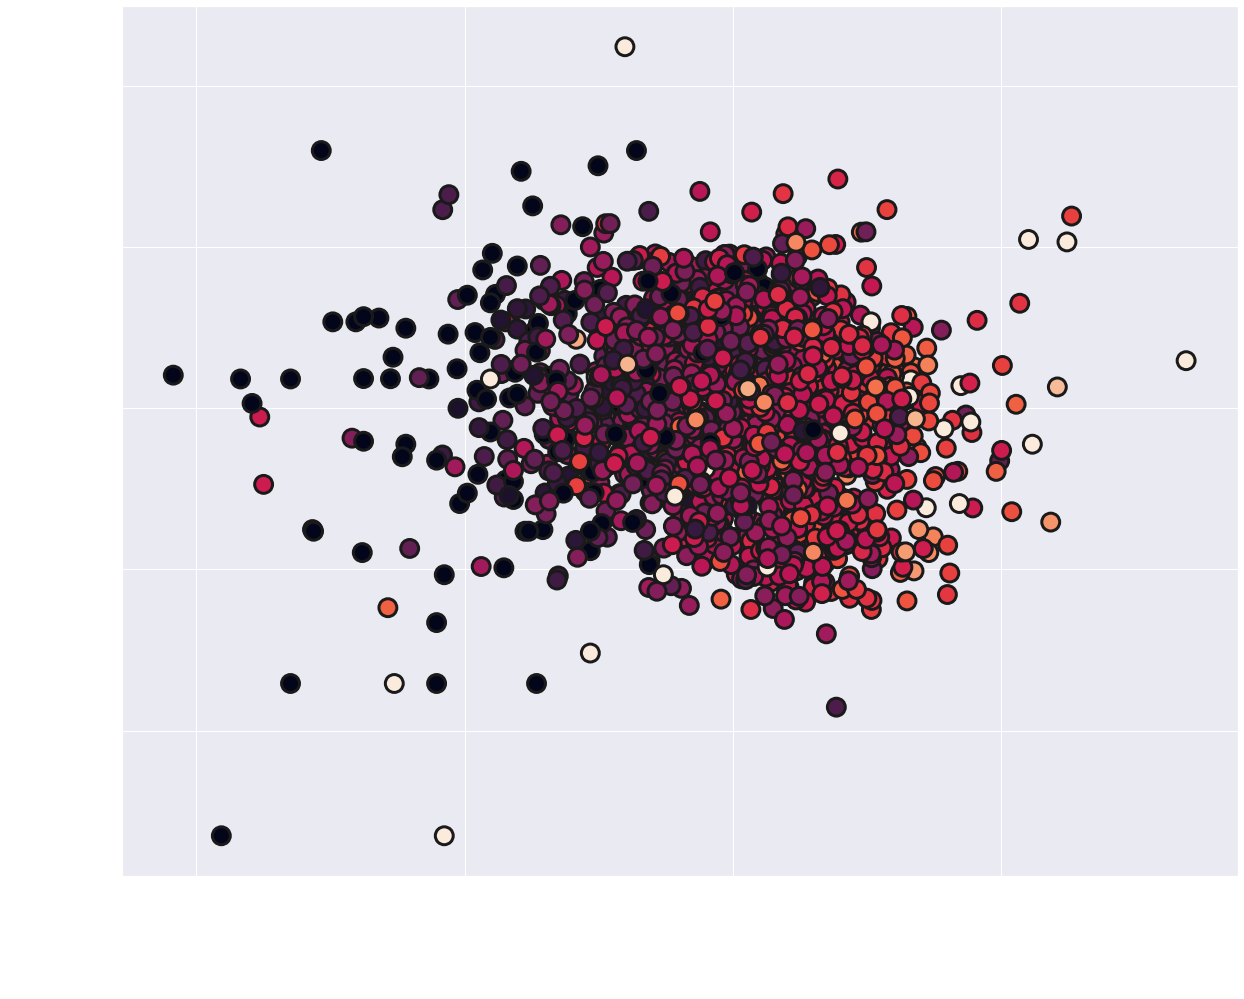

In [98]:
# plot
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rating'], df['prize'], df['hs_perc'], c=df['win_rate'], s=320, linewidths=3, edgecolors='k')

ax.set_xlabel('Rating',labelpad=40)
ax.set_ylabel('Prize Rating',labelpad=40)
ax.set_zlabel('HS %',labelpad=40)

# sns.despine(left=True)
# sns.despine(right=True)
# sns.despine(top=True)
# sns.despine(fig=fig, ax=ax, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
# ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])

# plt.savefig('3d.png', transparent=True)



fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
ax.scatter(df['rating'], df['hs_perc'], c=df['win_rate'], s=320, linewidths=3, edgecolors='k')

ax.set_xlabel('Rating',labelpad=40)
ax.set_ylabel('HS %',labelpad=40)

# sns.despine(left=True)
# sns.despine(right=True)
# sns.despine(top=True)
# sns.despine(fig=fig, ax=ax, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
# ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig('2d.png', transparent=True)


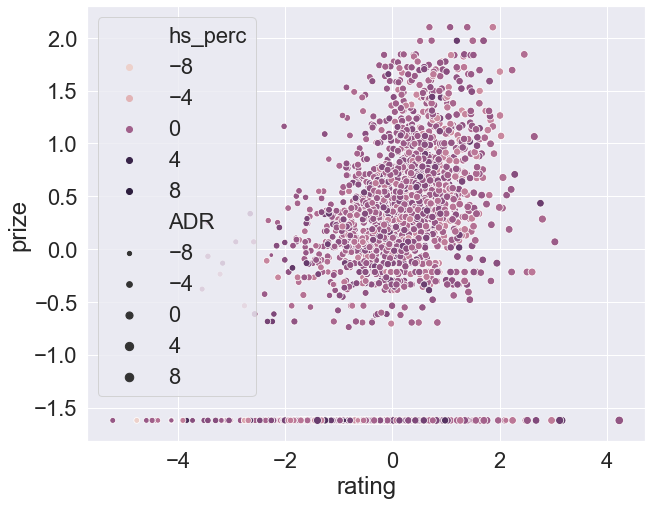

In [70]:
sns.set_style("whitegrid")
sns.set(font_scale=2)

plt.figure(figsize=(10,8))
# ax1 = sns.scatterplot(data=data_tmp,x='win',y='ADR')

sns.scatterplot(data=df,x='rating',y='prize',size='ADR',hue='hs_perc')
# plt.title('Data from 2019');
# plt.xlabel('Win Percentage');
# plt.ylabel('Average Team Damage per Round');

In [0]:
# Using Cosine Similarity
player_id = 7998

df = pd.DataFrame.from_dict(player_aux,orient='index')

df.prize = (df.prize - df.prize.mean()) / df.prize.std()
df.rating = (df.rating - df.rating.mean()) / df.rating.std()
df.head()

for column in df:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    
df_dist = df
df_dist['dist'] = df['rating']*0.0


#norm_y = 0.0
df_dist['norm_x'] = df_dist['dist']*0.0
for column in df:
    df_dist['norm_x'] = df_dist['norm_x'] + df_dist[column]**2

df_dist['norm_x'] = np.sqrt( df_dist['norm_x'] )


for column in df:
    df_dist[column] = df[column]*df_dist.loc[player_id][column] / (df_dist['norm_x']*df_dist.loc[player_id][column])
    df_dist['dist'] = df_dist['dist'] + df_dist[column]



df_dist = df_dist.sort_values('dist',ascending=False)
for player_id in df_dist.index[:50]:
    print( dict_player[player_id].player_name.unique() )

df_dist.head()

In [0]:
dict_player[13230]